In [1]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *

import numpy as np
import matplotlib.pyplot as plt

# Source

In [2]:
folder = "data_190925_223906_red_Nq2_Nt2_Omq0.05_wdq6.434_Omc0.63_wdc3.8_dw0.2_wq6.5_sft0.134_wc4.0_g0.2_wsb0.0142"

## Get data

In [3]:
home = "/home/student/thesis/"
srcfolder = home + folder
ID = getID(srcfolder)
Nq, Nc, Nt, wq, shift, wc, Ec, g, sb, t0, t1, t2, t3, tg, gauss, smooth, Q, Np, H, psi0, e_ops, options, Omega, wd, Omegaq, Omegac, dw, wdq, wdc = getparams(srcfolder)
quants = getquants(srcfolder)
times, states, expect, e0, g1, e1, g0, coupling = load_data(quants, srcfolder)
if Nt == 1:
    H_args = {'t0' : t0, 't1' : t1, 't2' : t2, 't3' : t3, 'tg' : tg,
              'Q'  : Q, 'gauss' : gauss, 'smooth' : smooth, 'Nt' : Nt, 'wd' : wd}
elif Nt == 2:
    H_args = {'t0' : t0, 't1' : t1, 't2' : t2, 't3' : t3, 'tg' : tg,
              'Q'  : Q, 'gauss' : gauss, 'smooth' : smooth, 'Nt' : Nt, 'wdq' : wdq, 'wdc' : wdc}
print(2*Omegac/2/pi)

1.268


In [4]:
""" SIDEBAND COUPLING """

smoothen_method = 'savgol'

if 'e0' in quants:
    e0_macro, e0_macro_times = remove_micromotion(e0, times, method=smoothen_method)
if 'g0' in quants:
    g0_macro, g0_macro_times = remove_micromotion(g0, times, method=smoothen_method)
if 'e1' in quants:
    e1_macro, e1_macro_times = remove_micromotion(e1, times, method=smoothen_method)
if 'g1' in quants:
    g1_macro, g1_macro_times = remove_micromotion(g1, times, method=smoothen_method)
if ('e1' in quants and 'g0' in quants):
    e1g0_macro, e1g0_macro_times = remove_micromotion(e1-g0, times, method=smoothen_method)
if ('e0' in quants and 'g1' in quants):
    e0g1_macro, e0g1_macro_times = remove_micromotion(e0-g1, times, method=smoothen_method)

if sb == 'red':
    wsb = sideband_freq(e0g1_macro, e0g1_macro_times)
elif sb == 'blue':
    wsb = sideband_freq(e1g0_macro, e1g0_macro_times)

print("wsb =", wsb/2/pi, "GHz")

wsb = 0.0142146935488 GHz


## Visualize data

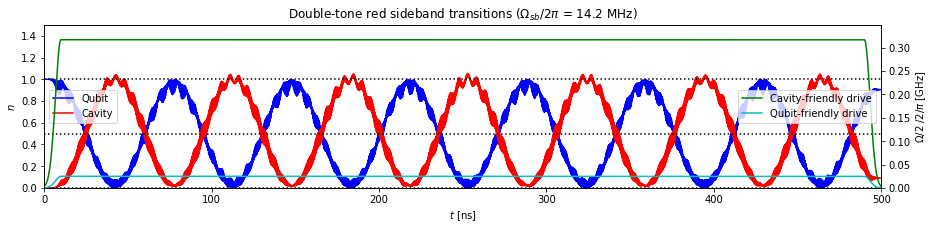

In [5]:
""" EXPECTATION VALUES """

xlim = None
ylim = None

if sb == 'red':
    if Nt == 1:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wd=wd, wsb=wsb, Omega=Omega)
    elif Nt == 2:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wsb=wsb, Omegaq=Omegaq, Omegac=Omegac)
elif sb == 'blue':
    if Nt == 1:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wd=wd, wsb=wsb, Omega=Omega)
    elif Nt == 2:
        figqc = sb_expect(times, expect, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                          wsb=wsb, Omegaq=Omegaq, Omegac=Omegac)

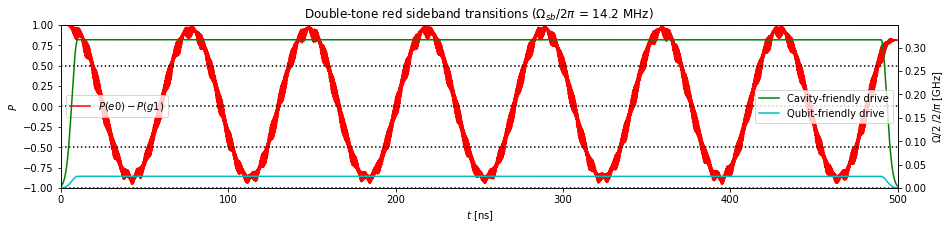

In [6]:
"""COMBINED PROBABILITIES"""

xlim = None#[0, 3]
ylim = None#[0.99, 1.01]

if sb == 'red':
    if Nt == 1:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e0=e0, g1=g1, wd=wd, wsb=wsb, Omega=Omega)
    elif Nt == 2:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e0=e0, g1=g1, wsb=wsb, Omegaq=Omegaq, Omegac=Omegac)
elif sb == 'blue':
    if Nt == 1:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e1=e1, g0=g0, wd=wd, wsb=wsb, Omega=Omega)
    elif Nt == 2:
        fig = sb_combined_probs(times, sb, Nt, H_args, coupling, xlim=xlim, ylim=ylim, figsize=[15,3],
                                e1=e1, g0=g0, wsb=wsb, Omegaq=Omegaq, Omegac=Omegac)

# Play around

In [ ]:
plt.figure(figsize=[15,3])
if sb == 'red':
    x, t = cluster(e0g1_macro, e0g1_macro_times)
    plt.plot(e0g1_macro_times, e0g1_macro, alpha=1)
elif sb == 'blue':
    x, t = cluster(e1g0_macro, e1g0_macro_times)
    plt.plot(e1g0_macro_times, e1g0_macro, alpha=1)
plt.plot(t, x, 'o', color='g')
# plt.xlim([490,500])
# plt.ylim([0.39, 0.42])
plt.show()